Import necessary packages, define file libraries, define runs

In [123]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import rasterio
import pandas as pd
import nc_time_axis

# set path to output files 
path = '//clusterfs/biodiversity/annavo/LPJmL56Fit/'

# Single Logging vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_single'] # Tapajos
runs = ['paracou_none','paracou_mort0.04_dbh0.5_single'] # Paracou

# Different Logging Time Cycles vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_single', 'tapajos_mort0.04_dbh0.5_50yr', 'tapajos_mort0.04_dbh0.5_25yr'] # Tapajos
runs = ['paracou_none','paracou_mort0.04_dbh0.5_single', 'paracou_mort0.04_dbh0.5_50yr', 'paracou_mort0.04_dbh0.5_25yr'] # Paracou 

# Different dbh treshold vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_50yr','tapajos_mort0.04_dbh0.35_50yr'] # Tapajos
runs = ['paracou_none','paracou_mort0.04_dbh0.5_50yr','paracou_mort0.04_dbh0.35_50yr'] # Paracou
# Different logging_mort vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_single', 'tapajos_mort0.12_dbh0.5_single'] # Tapajos
runs = ['paracou_none','paracou_mort0.04_dbh0.5_single', 'paracou_mort0.12_dbh0.5_single'] # Paracou

# File Libraries

# Biomass File (above ground carbon)
output_file_agb = {'agb.nc': 'AGB'}

# Logging Files
output_files_logging = {'num_logging.nc': 'num_logging', 'vol_logging.nc':'vol_logging'} #, 'timber_harvestc.nc': 'timber_harvestc'}
output_files_logging_units = {'num_logging.nc': '1/ha', 'vol_logging.nc':'m³/ha'} #, 'timber_harvestc.nc': 'gC/ha'}
output_files_logging_title = {'num_logging.nc': 'number of trees logged', 'vol_logging.nc':'volume of trees logged'} #, 'timber_harvestc.nc': 'carbon harvested as timber'}

# Trait Files (For Biomass Weighted Trait Mean)
output_files_traits_biomass = {'sla_mass.nc': 'mass_sla', 'wooddens_mass.nc':'mass_wooddens'}
output_files_traits_bins = {'sla_mass.nc': 'sla', 'wooddens_mass.nc':'wooddens'}
output_files_traits_bins_units =  {'sla_mass.nc': 'mm²/mg', 'wooddens_mass.nc':'g/cm³'}
scalings = {'sla_mass.nc': 1000*0.455, 'wooddens_mass.nc': (10**-6) / 0.455}
output_files_traits_title = {'sla_mass.nc': 'Specific Leaf Area', 'wooddens_mass.nc':'Wood Density'}

# Trait Files (For Individual Weighted Trait Mean)
output_files_traits_ind = {'sla_ind.nc': 'num_sla', 'wooddens_ind.nc': 'num_wooddens'}
output_files_traits_ind_bins = {'sla_ind.nc': 'sla', 'wooddens_ind.nc': 'wooddens'}
output_files_traits_ind_bins_units = {'sla_ind.nc': 'mm²/mg', 'wooddens_ind.nc': 'g/cm³'}
ind_scalings = {'sla_ind.nc': 1000 * 0.455, 'wooddens_ind.nc': (10 ** -6) / 0.455}
output_files_traits_ind_title = {'sla_ind.nc': 'Specific Leaf Area', 'wooddens_ind.nc': 'Wood Density'}

# Age distribution (biomass)
output_files_age_biomass = {'age_mass.nc': 'mass_age'}
output_files_age_bins = {'age_mass.nc': 'age'}
output_files_age_bins_units =  {'age_mass.nc': 'years'}
age_scalings = {'age_mass.nc': 1}

# Age distribution (inddividuals)
output_files_age_ind = {'age_ind.nc': 'num_age'}
output_files_age_ind_bins = {'age_ind.nc': 'age'}
output_files_age_ind_bins_units =  {'age_ind.nc': 'years'}
age_ind_scalings = {'age_ind.nc': 1}

# Height distribution (biomass)
output_files_height_biomass = {'height_mass.nc': 'mass_height'}
output_files_height_bins = {'height_mass.nc': 'height'}
output_files_height_bins_units =  {'height_mass.nc': 'm'}
height_scalings = {'height_mass.nc': 1}

# Height distribution (individuals)
output_files_height_ind = {'height_ind.nc': 'num_height'}
output_files_height_ind_bins = {'height_ind.nc': 'height'}
output_files_height_ind_bins_units =  {'height_ind.nc': 'm'}
height_ind_scalings = {'height_ind.nc': 1}

Logging Outputs

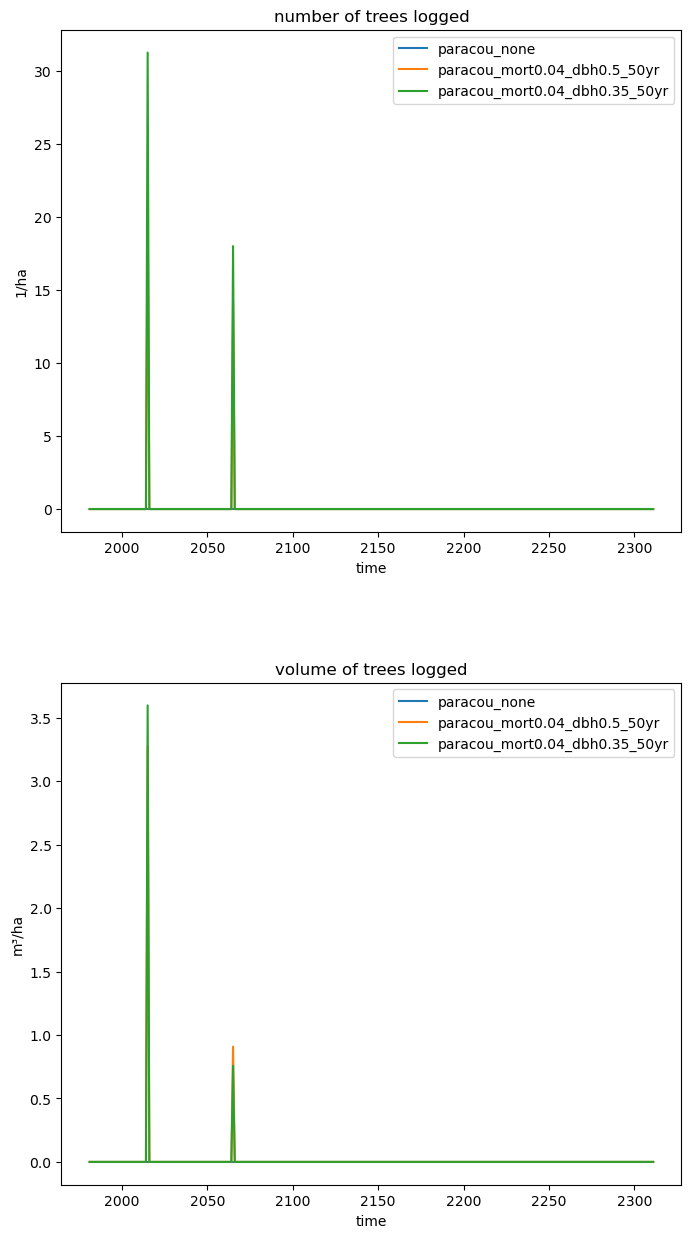

In [68]:
# Create figure and subplots
fig, axs = plt.subplots(len(output_files_logging), 1, figsize=(8, 15))

"""
# Define time slice for plot
start = '2000'
end = '2010'
time_slice = slice(start, end)
"""

# Loop through output files
for i, file in enumerate(output_files_logging):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        try: 
            ds = xr.open_dataset(os.path.join(path, run, 'output', file))
        except:
            print(f"Error opening {os.path.join(path, run, 'output', file)}")
            continue
        variable = output_files_logging[file]
        unit = output_files_logging_units[file]
        title = output_files_logging_title[file]
        ds_variable = ds[variable] * 10000  # from 1/m² to 1/ha
        # if time_slice is defined above use code in line below and put # in front of code in line above 
        # ds_variable = ds[variable].sel(time=time_slice) * 10000  # from 1/m² to 1/ha 
        ds_variable.plot(ax=axs[i], label = run)

    # Set title and legend for subplot
    axs[i].set_title(title)
    axs[i].legend()

    # Set axis labels for subplot
    axs[i].set_xlabel('time')
    # add ylim for each plot (maybe with list?)
    axs[i].set_ylabel(unit)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)

plt.show()

Logging Outputs yearly (CSV)

In [152]:
# Logging Files

# Choose number of trees logged or volume of wood logged
output_files_logging = {'num_logging.nc': 'num_logging'}
output_files_logging_units = {'num_logging.nc': '1/ha'}

output_files_logging = {'vol_logging.nc':'vol_logging'} 
output_files_logging_units = {'vol_logging.nc':'m³/ha'}

# define run for created csv file
runs = ['paracou_mort0.04_dbh0.5_single']

# Initialize empty lists to store data
logging_data = []

# Loop through each output file
for i, file in enumerate(output_files_logging):
    # Loop through runs and extract data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        variable = output_files_logging[file]
        ds[variable] *= 10000  # convert from 1/m² to 1/ha
   
        logging_data.append(ds[variable].values)
        
# Create NumPy arrays for SLA and Wood Density
agb_array = np.array(logging_data)

# Define the file path where you want to save the CSV file
csv_file = 'logging_values_yearly.csv'

# Open the CSV file in write mode
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',')

    # Write the data to the CSV file
    for row in agb_array.reshape(-1, 1):  # Reshape the array into a one-dimensional form
        writer.writerow(row)



AGB Value yearly (CSV)

In [31]:
# define run for created csv file
runs = ['tapajos_mort0.04_dbh0.5_50yr']

# Initialize empty lists to store data
agb_data = []

# Loop through each output file
for i, file in enumerate(output_file_agb):
    # Loop through runs and extract data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_file_agb[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        agb_data.append(ds[trait_variable].values)
        
# Create NumPy arrays for SLA and Wood Density
agb_array = np.array(agb_data)

# Define the file path where you want to save the CSV file
csv_file = 'agb_values_yearly.csv'

# Open the CSV file in write mode
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',')

    # Write the data to the CSV file
    for row in agb_array.reshape(-1, 1):  # Reshape the array into a one-dimensional form
        writer.writerow(row)



AGB Mean and Std Dev over time intervals (Table)

In [33]:
import xarray as xr
import os
import numpy as np
from tabulate import tabulate

# Set the run you want to analyze
run = 'tapajos_mort0.12_dbh0.5_single'

# Construct the file path
filepath = os.path.join('//clusterfs/biodiversity/annavo/LPJmL56Fit/', run, 'output', 'agb.nc')

# Open the dataset
ds = xr.open_dataset(filepath)

variable = 'AGB'
ds_variable = ds[variable] * 0.001  # convert gC to kgC

# Define the indices for specific years
year_indices = {
    1981: 0,
    2010: 29,
    2013: 32,
    2017: 36,
    2020: 39,   
    2035: 54,
    2038: 57,
    2042: 61,
    2045: 64,
    2060: 79,    
    2063: 82,
    2067: 86,
    2070: 89,
    2085: 104,   
    2088: 107,
    2092: 111,
    2095: 114,  
    2145: 165,   
    2150: 169,
    2195: 214,
    2200: 219,
    2245: 264,   
    2250: 269,
    2295: 314,
    2300: 319

}

# Define the intervals using start and end year indices
intervals = {
    '2010-2013': (year_indices[2010], year_indices[2013]),
    '2017-2020': (year_indices[2017], year_indices[2020]),
    '2035-2038': (year_indices[2035], year_indices[2038]),
    '2042-2045': (year_indices[2042], year_indices[2045]),
    '2060-2063': (year_indices[2060], year_indices[2063]),
    '2067-2070': (year_indices[2067], year_indices[2070]),
    '2085-2088': (year_indices[2085], year_indices[2088]),
    '2092-2095': (year_indices[2092], year_indices[2095]),
    '2145-2150': (year_indices[2145], year_indices[2150]),
    '2195-2200': (year_indices[2195], year_indices[2200]),
    '2245-2250': (year_indices[2245], year_indices[2250]),
    '2295-2300': (year_indices[2295], year_indices[2300])
}

# Prepare data for tabular format
table_data = []
for interval, (start_index, end_index) in intervals.items():
    agb_values_interval = ds_variable.values[start_index:end_index + 1]
    mean_agb_interval = np.mean(agb_values_interval)
    std_dev_agb_interval = np.std(agb_values_interval)
    table_data.append([interval, mean_agb_interval, std_dev_agb_interval])

# Print table
table_headers = ["Interval", "Mean AGB (kgC/m²)", "Std Dev AGB"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))


+------------+---------------------+---------------+
| Interval   |   Mean AGB (kgC/m²) |   Std Dev AGB |
+============+=====================+===============+
| 2010-2013  |            18.2653  |     0.231536  |
+------------+---------------------+---------------+
| 2017-2020  |             9.79603 |     0.139448  |
+------------+---------------------+---------------+
| 2035-2038  |            10.6621  |     0.112148  |
+------------+---------------------+---------------+
| 2042-2045  |            11.4042  |     0.164858  |
+------------+---------------------+---------------+
| 2060-2063  |            12.0135  |     0.0773782 |
+------------+---------------------+---------------+
| 2067-2070  |            12.0821  |     0.160019  |
+------------+---------------------+---------------+
| 2085-2088  |            13.1407  |     0.253662  |
+------------+---------------------+---------------+
| 2092-2095  |            13.8772  |     0.118985  |
+------------+---------------------+----------

Biomass Outputs (AGB) (Plot)

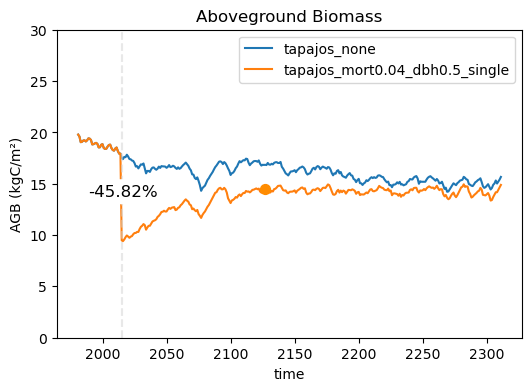

In [63]:
# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

# Define the indices for the vertical lines indicating when logging takes place
vertical_lines_years = [2015] #, 2040, 2065, 2090]


# Loop through output files
for i, file in enumerate(output_file_agb):

    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # check whether files open or not
        try: 
            ds = xr.open_dataset(os.path.join(path, run, 'output', file))
        except:
            print(f"Error opening {os.path.join(path, run, 'output', file)}")
            continue
        variable = output_file_agb[file]
        ds_variable = ds[variable] * 0.001  # convert gC to kgC
           
        ds_variable.plot(ax=axs, label=run)  # Remove indexing from axs


    # Set title and legend for subplot
    plt.title('Aboveground Biomass')
    plt.legend()

    # Set axis labels for subplot
    plt.xlabel('time')
    plt.ylabel(variable + ' (kgC/m²)')
    plt.ylim(0, 30)
    

    # Add vertical dashed lines 
    for index in vertical_lines_years:
        plt.axvline(index, color='lightgray', alpha = 0.5, linestyle='--')


# Insert markers on the x-axis for specified years at the maximum y-value for each year
# 90% of AGB reached for the first time
    # Paracou: 2127: 14.446 (single DBH 0.5), 2159: 14.921 (50yr DBH 0.5), 2192:  14.415 (25yr DBH 0.5), 2230: 14.8 (50yr 0.35 DBH), 2128: 14.175 (single DBH 0.5 mort 0.12)
    # Tapajós: 2187: 14.331 (single DBH 0.5), 2150: 14.573 (50yr DBH 0.5), 2223: 13.433 (25yr DBH 0.5), 2212: 14.009 (50yr 0.35 DBH), 2141: 14.809 (single DBH 0.5 mort 0.12)

plt.scatter(2127, 14.446 , marker='o', color='darkorange', s=50, zorder =2)
#plt.scatter(2141, 14.809, marker='o', color='green', s=50, zorder =2)
#plt.scatter(2223, 13.433, marker='o', color='red', s=50, zorder =2)

"""
# for plot with single logging:
year_to_compare = 2016
value_reference_run = 17.500
value_singlelogging_run = 9.481 
placement_on_y = (value_reference_run + value_singlelogging_run)/2

percentage_difference = ((value_singlelogging_run - value_reference_run) / value_singlelogging_run) * 100

# Display the percentage difference as text on the plot
plt.text(year_to_compare, placement_on_y, f'{percentage_difference:.2f}%', va='bottom', ha='center', color='black', fontsize=12, bbox=dict(boxstyle='round', facecolor='white', edgecolor='none'),zorder =2)
"""
plt.show()
plt.show()



Biomass weighted Age CSV Output

In [122]:
import xarray as xr
import os
import numpy as np
from tabulate import tabulate
import csv

runs = ['tapajos_mort0.12_dbh0.5_single']

# Initialize empty lists to store data
age_data = []

# Loop through each output file
for i, file in enumerate(output_files_age_biomass):
    # Loop through runs and extract data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_age_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_age_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * age_scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_age_biomass[file]]
        trait_variable = output_files_age_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_age_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Store the data in the respective lists
        if file == 'age_mass.nc':
            age_data.append(biomass_weighted_dataarray.values)

# Create NumPy arrays for SLA and Wood Density
age_array = np.array(age_data)

# Define the file path where you want to save the CSV file
csv_file = 'age_mean_yearly.csv'

# Open the CSV file in write mode
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',')

    # Write the data to the CSV file
    for row in age_array.reshape(-1, 1):  # Reshape the array into a one-dimensional form
        writer.writerow(row)


Biomass weighted Age mean

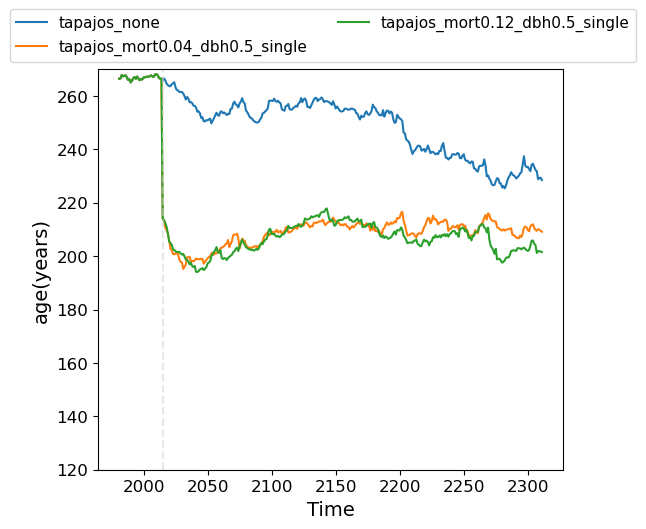

In [32]:

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

# Define the indices for the vertical lines (representing logging operations)
vertical_lines_indices = [2015]

# Loop through each output file# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 4.5))  # Increase the height of the figure
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=1)


# Loop through each output file
for i, file in enumerate(output_files_age_biomass):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_age_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_age_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * age_scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars('longitude')
        ds = ds.drop_vars('latitude')
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_age_biomass[file]]
        trait_variable = output_files_age_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_age_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Plot data
        biomass_weighted_dataarray.plot(ax=axs, label=run)

    # Set title and y-axis limits for subplot
    axs.set_ylim(120, 270)

    # Set axis labels for subplot
    axs.set_xlabel('Time', fontdict=font)
    axs.set_ylabel(output_files_age_bins[file] + '(' + output_files_age_bins_units[file] + ')', fontdict=font)

# Add vertical dashed lines outside the inner loop
for index in vertical_lines_indices:
    axs.axvline(index, color='lightgray', alpha=0.5, linestyle='--')

# Create a single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True, facecolor='white', fontsize=11)

plt.rc ('xtick', labelsize = 12) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 12) #Schriftgröße der y-Tick-Labels

plt.show()


Individual weighted age mean over time

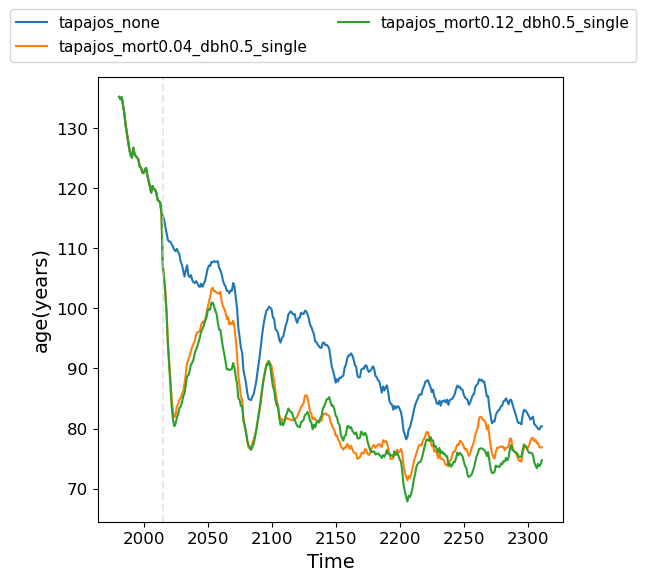

In [8]:
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

# Define the indices for the vertical lines (representing logging operations)
vertical_lines_indices = [2015]

# Loop through each output file# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))  # Increase the height of the figure
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=1)


# Loop through each output file
for i, file in enumerate(output_files_age_ind):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_age_ind[file]
        ds[trait_variable] # *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_age_ind_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * age_ind_scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars('longitude')
        ds = ds.drop_vars('latitude')
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_age_ind[file]]
        trait_variable = output_files_age_ind_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_age_ind_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Plot data
        biomass_weighted_dataarray.plot(ax=axs, label=run)

    # Set title and y-axis limits for subplot
   # axs.set_ylim(120, 270)

    # Set axis labels for subplot
    axs.set_xlabel('Time', fontdict=font)
    axs.set_ylabel(output_files_age_ind_bins[file] + '(' + output_files_age_ind_bins_units[file] + ')', fontdict=font)

# Add vertical dashed lines outside the inner loop
for index in vertical_lines_indices:
    axs.axvline(index, color='lightgray', alpha=0.5, linestyle='--')

# Create a single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True, facecolor='white', fontsize=11)

plt.rc ('xtick', labelsize = 12) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 12) #Schriftgröße der y-Tick-Labels

plt.show()


Biomass weighted height CSV output

In [88]:
import xarray as xr
import os
import numpy as np
from tabulate import tabulate
import csv

runs = ['paracou_mort0.04_dbh0.5_50yr']

# Initialize empty lists to store data
height_data = []

# Loop through each output file
for i, file in enumerate(output_files_height_biomass):
    # Loop through runs and extract data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_height_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_height_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * height_scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_height_biomass[file]]
        trait_variable = output_files_height_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_height_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Store the data in the respective lists
        if file == 'height_mass.nc':
            height_data.append(biomass_weighted_dataarray.values)
        
# Create NumPy arrays for SLA and Wood Density
height_array = np.array(height_data)

# Define the file path where you want to save the CSV file
csv_file = 'height_mean_yearly.csv'

# Open the CSV file in write mode
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',')

    # Write the data to the CSV file
    for row in height_array.reshape(-1, 1):  # Reshape the array into a one-dimensional form
        writer.writerow(row)


Biomass weighted height mean

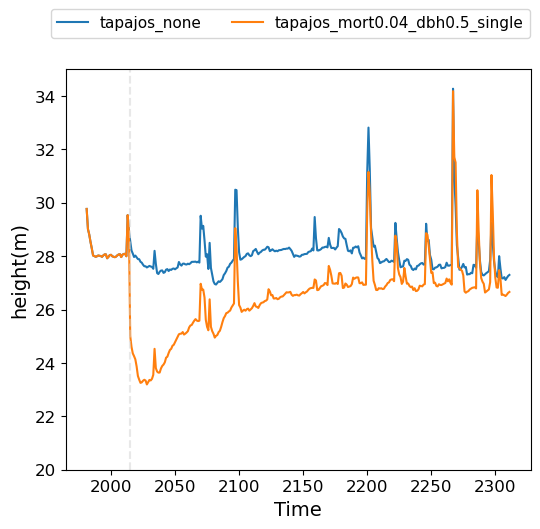

In [43]:
# Single Logging vs. None
runs = ['tapajos_none','tapajos_mort0.04_dbh0.5_single'] # Tapajos




font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

# Define the indices for the vertical lines (representing logging operations)
vertical_lines_indices = [2015]

# Loop through each output file# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 4.5))  # Increase the height of the figure
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=1)


# Loop through each output file
for i, file in enumerate(output_files_height_biomass):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_height_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_height_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * height_scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars('longitude')
        ds = ds.drop_vars('latitude')
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_height_biomass[file]]
        trait_variable = output_files_height_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_height_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Plot data
        biomass_weighted_dataarray.plot(ax=axs, label=run)

    # Set title and y-axis limits for subplot
    axs.set_ylim(20, 35)

    # Set axis labels for subplot
    axs.set_xlabel('Time', fontdict=font)
    axs.set_ylabel(output_files_height_bins[file] + '(' + output_files_height_bins_units[file] + ')', fontdict=font)

# Add vertical dashed lines outside the inner loop
for index in vertical_lines_indices:
    axs.axvline(index, color='lightgray', alpha=0.5, linestyle='--')

# Create a single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True, facecolor='white', fontsize=11)

plt.rc ('xtick', labelsize = 12) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 12) #Schriftgröße der y-Tick-Labels

plt.show()


indivudal weighted height mean over time

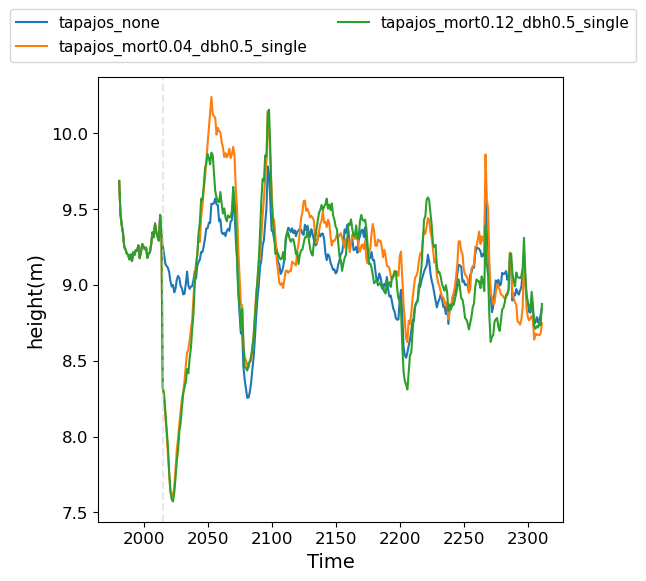

In [10]:

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

# Define the indices for the vertical lines (representing logging operations)
vertical_lines_indices = [2015]

# Loop through each output file# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))  # Increase the height of the figure
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=1)


# Loop through each output file
for i, file in enumerate(output_files_height_ind):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_height_ind[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_height_ind_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * height_ind_scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars('longitude')
        ds = ds.drop_vars('latitude')
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_height_ind[file]]
        trait_variable = output_files_height_ind_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_height_ind_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Plot data
        biomass_weighted_dataarray.plot(ax=axs, label=run)

    # Set title and y-axis limits for subplot
    #axs.set_ylim(20, 35)

    # Set axis labels for subplot
    axs.set_xlabel('Time', fontdict=font)
    axs.set_ylabel(output_files_height_ind_bins[file] + '(' + output_files_height_ind_bins_units[file] + ')', fontdict=font)

# Add vertical dashed lines outside the inner loop
for index in vertical_lines_indices:
    axs.axvline(index, color='lightgray', alpha=0.5, linestyle='--')

# Create a single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True, facecolor='white', fontsize=11)

plt.rc ('xtick', labelsize = 12) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 12) #Schriftgröße der y-Tick-Labels

plt.show()


Age shift (step-diagram with biomass distribution of average over multiple years pre/post logging)

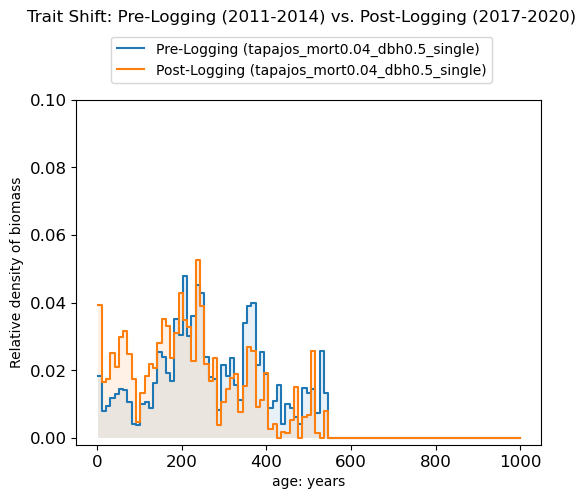

In [90]:
# Define run
run = 'tapajos_mort0.04_dbh0.5_single'

# Define time range for average pre-logging
pre_firstyear = 2011
pre_lastyear = 2014

# Define time range for average post-logging
post_firstyear = 2017
post_lastyear = 2020

# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=0.8)

# Loop through output files
for i, file in enumerate(output_files_age_biomass):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_age_bins[file]][:] * age_scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_age_biomass[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_age_bins[file])
    if i == 0:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_age_bins[file]][:] * age_scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_age_biomass[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_age_bins[file])
    if i == 0:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post', label=('Post-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    axs.set_xlabel(output_files_age_bins[file] + ': ' + output_files_age_bins_units[file])
    axs.set_ylim(-0.002, 0.1)
    axs.set_ylabel('Relative density of biomass')

# Set overall title for figure
fig.suptitle('Trait Shift: Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Display legend with labels for the step lines
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=1)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


Age shift (step-diagram with individuals distribution of average over multiple years pre/post logging)

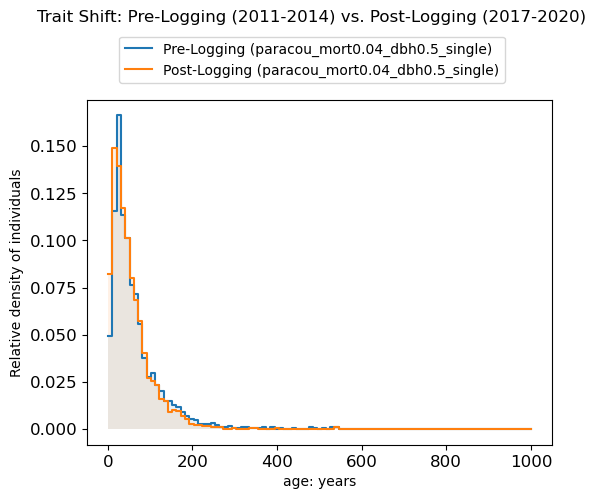

In [14]:
# Define run
run = 'paracou_mort0.04_dbh0.5_single'

# Define time range for average pre-logging
pre_firstyear = 2011
pre_lastyear = 2014

# Define time range for average post-logging
post_firstyear = 2017
post_lastyear = 2020

# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=0.8)

# Loop through output files
for i, file in enumerate(output_files_age_ind):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_age_ind_bins[file]][:] * age_ind_scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_age_ind[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_age_ind_bins[file])
    if i == 0:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_age_ind_bins[file]][:] * age_ind_scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_age_ind[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_age_ind_bins[file])
    if i == 0:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post', label=('Post-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    axs.set_xlabel(output_files_age_ind_bins[file] + ': ' + output_files_age_ind_bins_units[file])
    # axs.set_ylim(-0.002, 0.1)
    axs.set_ylabel('Relative density of individuals')

# Set overall title for figure
fig.suptitle('Trait Shift: Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Display legend with labels for the step lines
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=1)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


height shift (step-diagram with biomass distribution of average over multiple years pre/post logging)

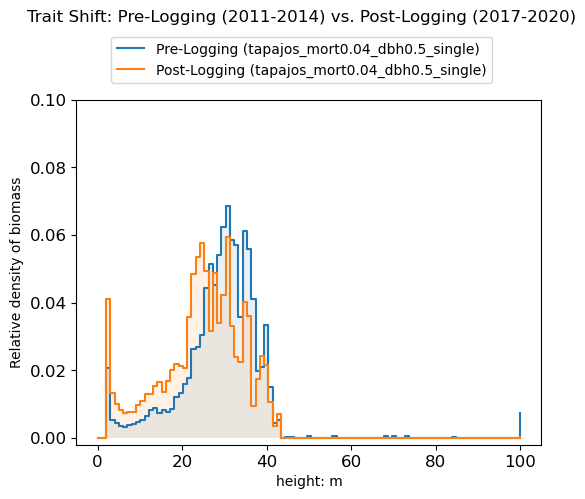

In [92]:
# Define run
run = 'tapajos_mort0.04_dbh0.5_single'

# Define time range for average pre-logging
pre_firstyear = 2011
pre_lastyear = 2014

# Define time range for average post-logging
post_firstyear = 2017
post_lastyear = 2020

# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=0.8)

# Loop through output files
for i, file in enumerate(output_files_height_biomass):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_height_bins[file]][:] * height_scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_height_biomass[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_height_bins[file])
    if i == 0:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_height_bins[file]][:] * height_scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_height_biomass[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_height_bins[file])
    if i == 0:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post', label=('Post-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    axs.set_xlabel(output_files_height_bins[file] + ': ' + output_files_height_bins_units[file])
    axs.set_ylim(-0.002, 0.1)
    axs.set_ylabel('Relative density of biomass')

# Set overall title for figure
fig.suptitle('Trait Shift: Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Display legend with labels for the step lines
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=1)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


height shift (step-diagram with individual distribution of average over multiple years pre/post logging)

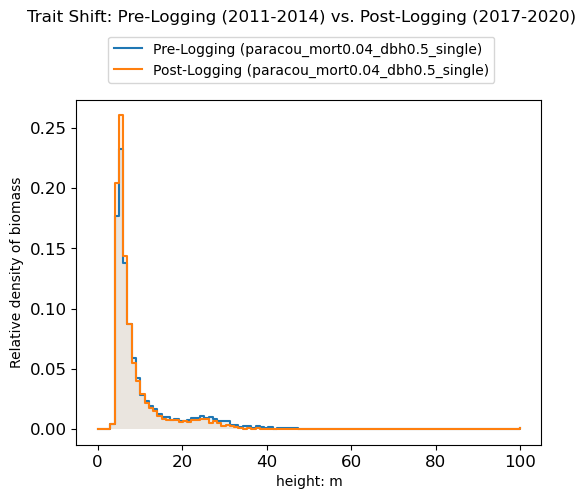

In [18]:
# Define run
run = 'paracou_mort0.04_dbh0.5_single'

# Define time range for average pre-logging
pre_firstyear = 2011
pre_lastyear = 2014

# Define time range for average post-logging
post_firstyear = 2017
post_lastyear = 2020

# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=0.8)

# Loop through output files
for i, file in enumerate(output_files_height_ind):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_height_ind_bins[file]][:] * height_ind_scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_height_ind[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_height_ind_bins[file])
    if i == 0:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_height_ind_bins[file]][:] * height_ind_scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_height_ind[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_height_ind_bins[file])
    if i == 0:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post', label=('Post-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    axs.set_xlabel(output_files_height_ind_bins[file] + ': ' + output_files_height_ind_bins_units[file])
    #axs.set_ylim(-0.002, 0.1)
    axs.set_ylabel('Relative density of biomass')

# Set overall title for figure
fig.suptitle('Trait Shift: Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Display legend with labels for the step lines
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=1)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


Biomass weighted WD mean 

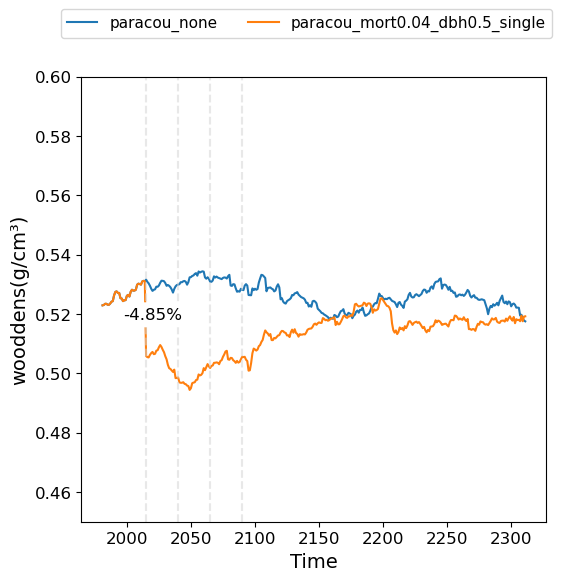

In [116]:
runs = {'paracou_none', 'paracou_mort0.04_dbh0.5_single'}

output_files_traits_biomass = {'wooddens_mass.nc':'mass_wooddens'}
output_files_traits_bins = {'wooddens_mass.nc':'wooddens'}
output_files_traits_bins_units =  {'wooddens_mass.nc':'g/cm³'}
scalings = {'wooddens_mass.nc': (10**-6) / 0.455}

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

# Define the indices for the vertical lines (representing logging operations)
vertical_lines_indices = [2015, 2040, 2065, 2090]

# Loop through each output file# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))  # Increase the height of the figure
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=1)


# Loop through each output file
for i, file in enumerate(output_files_traits_biomass):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_traits_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_traits_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars('longitude')
        ds = ds.drop_vars('latitude')
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_traits_biomass[file]]
        trait_variable = output_files_traits_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_traits_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Plot data
        biomass_weighted_dataarray.plot(ax=axs, label=run)

    # Set title and y-axis limits for subplot
    axs.set_ylim(0.45, 0.6)

    # Set axis labels for subplot
    axs.set_xlabel('Time', fontdict=font)
    axs.set_ylabel(output_files_traits_bins[file] + '(' + output_files_traits_bins_units[file] + ')', fontdict=font)

# Add vertical dashed lines outside the inner loop
for index in vertical_lines_indices:
    axs.axvline(index, color='lightgray', alpha=0.5, linestyle='--')

# Create a single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True, facecolor='white', fontsize=11)

"""

# for plot with single logging:
year_to_compare = 2020
value_reference_run = 0.5316162
value_singlelogging_run = 0.5058246
placement_on_y = (value_reference_run + value_singlelogging_run)/2-0.0015
percentage_difference = - 4.85
# Display the percentage difference as text on the plot
plt.text(year_to_compare, placement_on_y, f'{percentage_difference:.2f}%', va='bottom', ha='center', color='black', fontsize=12, bbox=dict(boxstyle='round', facecolor='white', edgecolor='none'),zorder =2)

"""
plt.rc ('xtick', labelsize = 12) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 12) #Schriftgröße der y-Tick-Labels

plt.show()


Biomass weighted SLA mean

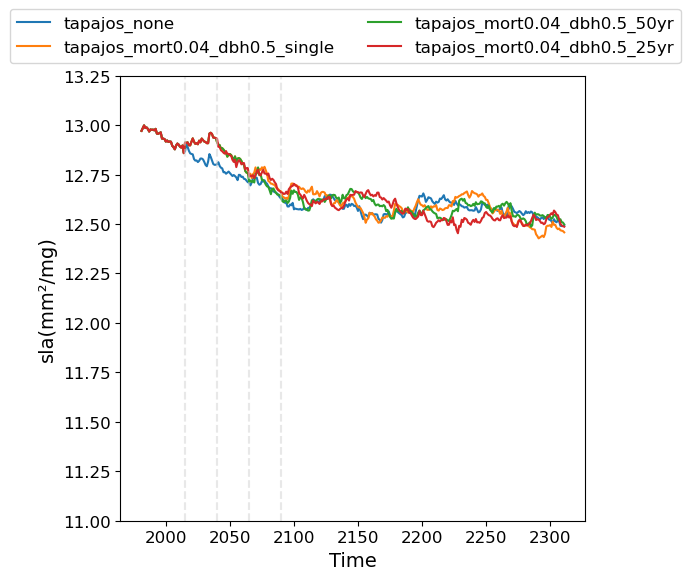

In [149]:
output_files_traits_biomass = {'sla_mass.nc': 'mass_sla'}
output_files_traits_bins = {'sla_mass.nc': 'sla'}
output_files_traits_bins_units =  {'sla_mass.nc': 'mm²/mg'}
scalings = {'sla_mass.nc': 1000*0.455}


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

# Define the indices for the vertical lines (representing logging operations)
vertical_lines_indices = [2015, 2040, 2065, 2090]

# Loop through each output file# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))  # Increase the height of the figure
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=1)


# Loop through each output file
for i, file in enumerate(output_files_traits_biomass):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_traits_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_traits_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars('longitude')
        ds = ds.drop_vars('latitude')
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_traits_biomass[file]]
        trait_variable = output_files_traits_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_traits_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Plot data
        biomass_weighted_dataarray.plot(ax=axs, label=run)

    # Set title and y-axis limits for subplot
    axs.set_ylim(11, 13.25)

    # Set axis labels for subplot
    axs.set_xlabel('Time', fontdict=font)
    axs.set_ylabel(output_files_traits_bins[file] + '(' + output_files_traits_bins_units[file] + ')', fontdict=font)

# Add vertical dashed lines outside the inner loop
for index in vertical_lines_indices:
    axs.axvline(index, color='lightgray', alpha=0.5, linestyle='--')

# Create a single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True, facecolor='white', fontsize=12)

plt.rc ('xtick', labelsize = 12) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 12) #Schriftgröße der y-Tick-Labels

plt.show()


Biomass weighted SLA and WD yearly (CSV Output)

In [32]:
import xarray as xr
import os
import numpy as np
from tabulate import tabulate
import csv

runs = ['tapajos_mort0.12_dbh0.5_single']

# Initialize empty lists to store data
sla_data = []
wooddens_data = []

# Loop through each output file
for i, file in enumerate(output_files_traits_biomass):
    # Loop through runs and extract data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_traits_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_traits_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_traits_biomass[file]]
        trait_variable = output_files_traits_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_traits_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Store the data in the respective lists
        if file == 'sla_mass.nc':
            sla_data.append(biomass_weighted_dataarray.values)
        elif file == 'wooddens_mass.nc':
            wooddens_data.append(biomass_weighted_dataarray.values)

# Create NumPy arrays for SLA and Wood Density
sla_array = np.array(sla_data)
wooddens_array = np.array(wooddens_data)

# Define the file path where you want to save the CSV file
csv_file = 'sla_mean_yearly.csv'

# Open the CSV file in write mode
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',')

    # Write the data to the CSV file
    for row in sla_array.reshape(-1, 1):  # Reshape the array into a one-dimensional form
        writer.writerow(row)

# Define the file path where you want to save the CSV file
csv_file = 'wd_mean_yearly.csv'

# Open the CSV file in write mode
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',')

    # Write the data to the CSV file
    for row in wooddens_array.reshape(-1, 1):  # Reshape the array into a one-dimensional form
        writer.writerow(row)


Trait Mean for SLA and WD (Biomass weighted)

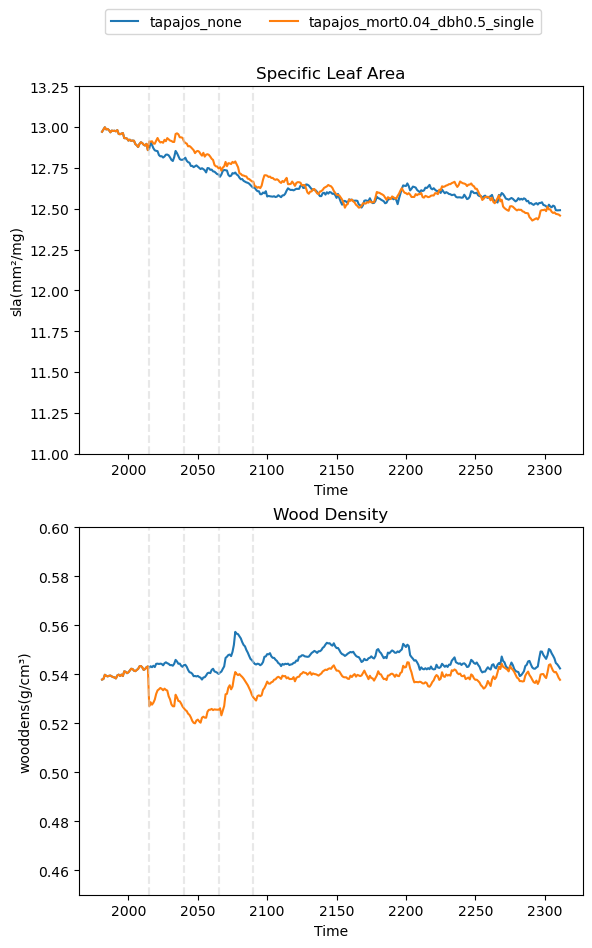

In [49]:
# Create figure and subplots
fig, axs = plt.subplots(len(output_files_traits_biomass), 1, figsize=(6.5, 10.5))  # Increase the height of the figure

# Define the indices for the vertical lines (representing logging operations)
vertical_lines_indices = [2015, 2040, 2065, 2090]

# Loop through each output file
for i, file in enumerate(output_files_traits_biomass):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Convert biomass variable to kgC/m²
        trait_variable = output_files_traits_biomass[file]
        ds[trait_variable] *= 0.001  # Convert gC/m² to kgC/m²

        # Scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_traits_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * scalings[file]

        # Drop old bins_variable and add scaled version
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of biomass
        weights = ds[output_files_traits_biomass[file]]
        trait_variable = output_files_traits_bins[file]

        # Calculate weighted mean of the biomass variable
        biomass_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_traits_bins[file])

        # Compute value of the weighted mean
        biomass_weighted_dataarray = biomass_weighted_dataarray.compute()

        # Plot data
        biomass_weighted_dataarray.plot(ax=axs[i], label=run)

    # Set title and y-axis limits for subplot
    axs[i].set_title(output_files_traits_title[file])
    if file == 'sla_mass.nc':
        axs[i].set_ylim(11, 13.25)
    elif file == 'wooddens_mass.nc':
        axs[i].set_ylim(0.45, 0.6)

    # Set axis labels for subplot
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(output_files_traits_bins[file] + '(' + output_files_traits_bins_units[file] + ')')
    # Add vertical dashed lines

# Add vertical dashed lines outside the inner loop
for index in vertical_lines_indices:
    for ax in axs:
        ax.axvline(index, color='lightgray', alpha=0.5, linestyle='--')

# Set overall title for figure
# fig.suptitle('Biomass Weighted Trait Mean')

# Create a single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=2)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.2)
plt.show()


Trait Mean for SLA and WD (Individual weighted)

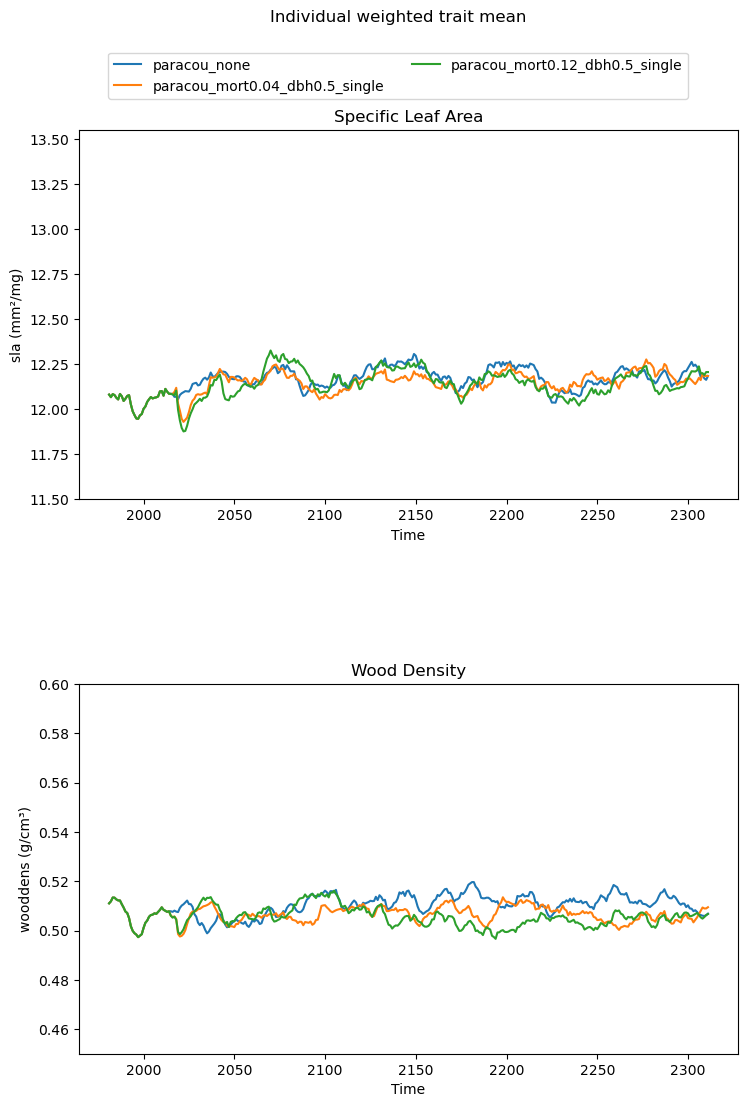

In [4]:
# Create figure and subplots
fig, axs = plt.subplots(len(output_files_traits_ind), 1, figsize=(8.5, 12))

# Loop through output files
for i, file in enumerate(output_files_traits_ind):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # open netCDF file
        ds = xr.open_dataset(os.path.join(path, run, 'output', file))

        # Extract variable for trait in the current file and convert to number of trees
        num_trait = output_files_traits_ind[file]
        #ds[num_trait] *= 800  # Convert number of trees in patch to number of trees in entire grid cell (800 patches per grid cell)

        # scale bins variable according to defined scaling factor in scalings
        bins_variable = output_files_traits_ind_bins[file]
        bins_dataarray = ds[bins_variable]
        bins_dataarray_scaled = bins_dataarray * ind_scalings[file]

        # Drop old bins variable and add scaled version
        ds = ds.drop_vars(bins_variable)
        ds[bins_variable] = bins_dataarray_scaled

        # Extract weight variable for weighted mean of trait in the current file
        weights = ds[output_files_traits_ind[file]]
        trait_variable = output_files_traits_ind_bins[file]

        # Calculate weighted mean of the trait variable
        trait_weighted_dataarray = ds[trait_variable].weighted(weights).mean(dim=output_files_traits_ind_bins[file])

        # Compute value of the weighted mean
        trait_weighted_dataarray = trait_weighted_dataarray.compute()

        # Plot data
        trait_weighted_dataarray.plot(ax=axs[i], label=run)

    # Set title and y-axis limits for subplot
    axs[i].set_title(output_files_traits_ind_title[file])
    if file == 'sla_ind.nc':
        axs[i].set_ylim(11.5, 13.55)
    elif file == 'wooddens_ind.nc':
        axs[i].set_ylim(0.45, 0.6)

    # Set axis labels for subplot
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(output_files_traits_ind_bins[file] + ' (' + output_files_traits_ind_bins_units[file] + ')')

# Set overall title for figure
fig.suptitle('Individual weighted trait mean')
# create single legend at the beginning of plots
legend_labels = [run for run in runs]
fig.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.5)
plt.show()


Trait Shift (Step-Diagram with distribution of Average Over Multiple Years Pre/Post Logging) - Legend upper center

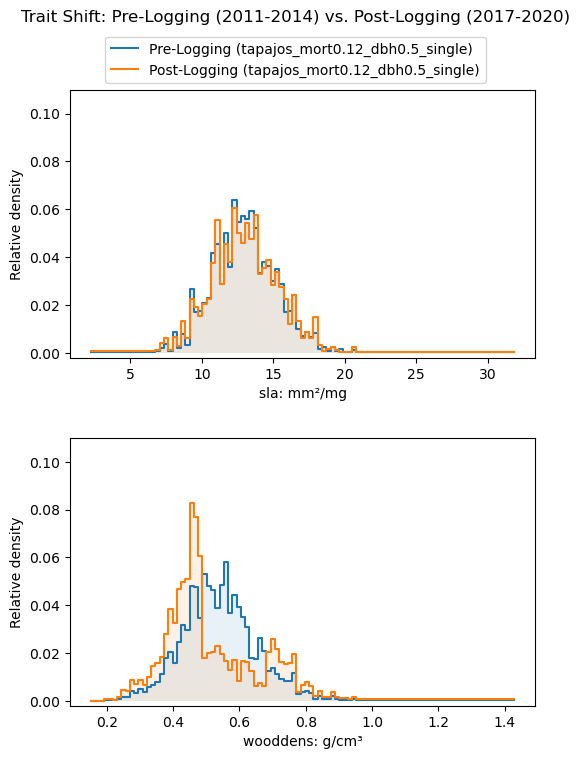

In [24]:
# Define run
run = 'tapajos_mort0.12_dbh0.5_single'

# Define time range for average pre-logging
pre_firstyear = 2011
pre_lastyear = 2014

# Define time range for average post-logging
post_firstyear = 2017
post_lastyear = 2020

# Create figure and subplots
fig, axs = plt.subplots(len(output_files_traits_biomass), 1, figsize=(6, 8))

# Loop through output files
for i, file in enumerate(output_files_traits_biomass):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_traits_bins[file])
    if i == 0:
        axs[i].step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs[i].step(pre_bins, pre_biomass_normalized.values.ravel(), where='post')
    axs[i].fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_traits_bins[file])
    if i == 0:
        axs[i].step(post_bins, post_biomass_normalized.values.ravel(), where='post', label=('Post-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs[i].step(post_bins, post_biomass_normalized.values.ravel(), where='post')
    axs[i].fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    # axs[i].set_title(output_files_traits_biomass[file])
    axs[i].set_xlabel(output_files_traits_bins[file] + ': ' + output_files_traits_bins_units[file])
    axs[i].set_ylim(-0.002, 0.11)
    axs[i].set_ylabel('Relative density')

# Set overall title for figure
fig.suptitle('Trait Shift: Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Display legend with labels for the step lines
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.955), ncol=1)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


WD Shift (Step-Diagram with distributuion average Over Multiple Years Pre/Post Logging)

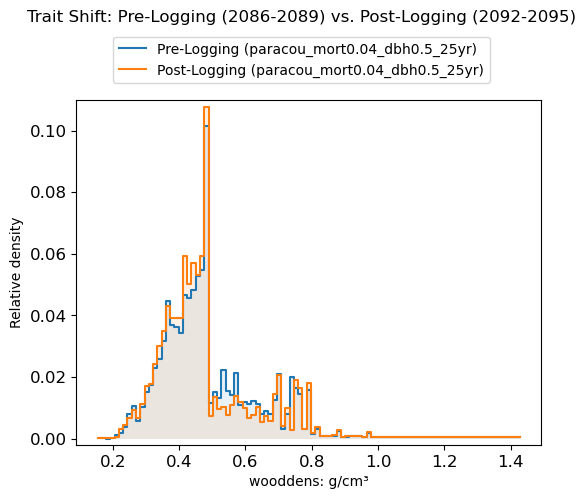

In [157]:
output_files_traits_biomass = {'wooddens_mass.nc':'mass_wooddens'}
output_files_traits_bins = {'wooddens_mass.nc':'wooddens'}
output_files_traits_bins_units =  {'wooddens_mass.nc':'g/cm³'}
scalings = {'wooddens_mass.nc': (10**-6) / 0.455}


# Define run
run = 'paracou_mort0.04_dbh0.5_25yr'

# Define time range for average pre-logging
pre_firstyear = 2086
pre_lastyear = 2089

# Define time range for average post-logging
post_firstyear = 2092
post_lastyear = 2095

# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=0.8)

# Loop through output files
for i, file in enumerate(output_files_traits_biomass):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_traits_bins[file])
    if i == 0:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_traits_bins[file])
    if i == 0:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post', label=('Post-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    # axs[i].set_title(output_files_traits_biomass[file])
    axs.set_xlabel(output_files_traits_bins[file] + ': ' + output_files_traits_bins_units[file])
    axs.set_ylim(-0.002, 0.11)
    axs.set_ylabel('Relative density')

# Set overall title for figure
fig.suptitle('Trait Shift: Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Display legend with labels for the step lines
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=1)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


SLA Shift (Step-Diagram with distributuion average Over Multiple Years Pre/Post Logging)

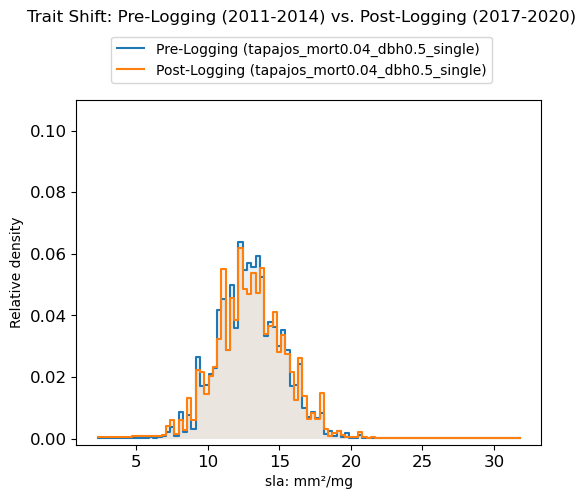

In [168]:
output_files_traits_biomass = {'sla_mass.nc': 'mass_sla'}
output_files_traits_bins = {'sla_mass.nc': 'sla'}
output_files_traits_bins_units =  {'sla_mass.nc': 'mm²/mg'}
scalings = {'sla_mass.nc': 1000*0.455}

# Define run
run = 'tapajos_mort0.04_dbh0.5_single'

# Define time range for average pre-logging
pre_firstyear = 2011
pre_lastyear = 2014

# Define time range for average post-logging
post_firstyear = 2017
post_lastyear = 2020

# Create figure and subplots
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
# Adjust figure layout to create more space for the legend
fig.subplots_adjust(top=0.8)

# Loop through output files
for i, file in enumerate(output_files_traits_biomass):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_traits_bins[file])
    if i == 0:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(pre_bins, pre_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_traits_bins[file])
    if i == 0:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post', label=('Post-Logging (' + run + ')')) # Only add label to legend once
    elif i == 1:
        axs.step(post_bins, post_biomass_normalized.values.ravel(), where='post')
    axs.fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    # axs[i].set_title(output_files_traits_biomass[file])
    axs.set_xlabel(output_files_traits_bins[file] + ': ' + output_files_traits_bins_units[file])
    axs.set_ylim(-0.002, 0.11)
    axs.set_ylabel('Relative density')

# Set overall title for figure
fig.suptitle('Trait Shift: Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Display legend with labels for the step lines
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=1)

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()


Trait Shift (Step-Diagram Average Over Multiple Years Pre/Post Logging) - Legend inside plots

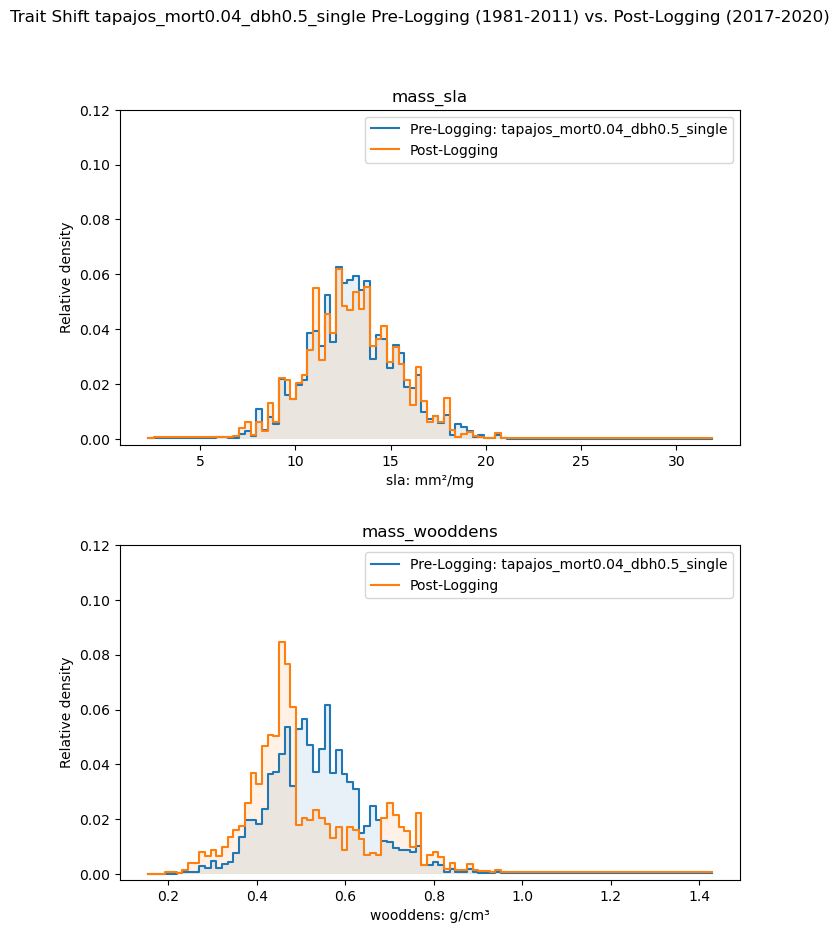

In [173]:
# Define run
run = 'tapajos_mort0.04_dbh0.5_single'

# Define time range for average pre-logging
pre_firstyear = 1981
pre_lastyear = 2011

# Define time range for average post-logging
post_firstyear = 2017
post_lastyear = 2020

# Create figure and subplots
fig, axs = plt.subplots(len(output_files_traits_biomass), 1, figsize=(8, 10))

# Loop through output files
for i, file in enumerate(output_files_traits_biomass):

    # Open file
    ds = xr.open_dataset(os.path.join(path, run, 'output', file))
    
    # Pre-logging
    pre_ds_last30years = ds.sel(time=slice(str(pre_firstyear), str(pre_lastyear)))
    pre_ds_last30years_mean = pre_ds_last30years.mean(dim='time')
    pre_bins = pre_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    pre_biomass = pre_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    pre_biomass_normalized = pre_biomass / pre_biomass.sum(dim=output_files_traits_bins[file])
    axs[i].step(pre_bins, pre_biomass_normalized.values.ravel(), where='post', label=('Pre-Logging: ' + run)) # Only add label to legend once
    axs[i].fill_between(pre_bins, pre_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Post-logging
    post_ds_last30years = ds.sel(time=slice(str(post_firstyear), str(post_lastyear)))
    post_ds_last30years_mean = post_ds_last30years.mean(dim='time')
    post_bins = post_ds_last30years_mean[output_files_traits_bins[file]][:] * scalings[file]
    post_biomass = post_ds_last30years_mean[output_files_traits_biomass[file]][:] * 0.001
    post_biomass_normalized = post_biomass / post_biomass.sum(dim=output_files_traits_bins[file])
    axs[i].step(post_bins, post_biomass_normalized.values.ravel(), where='post', label='Post-Logging') # Only add label to legend once
    axs[i].fill_between(post_bins, post_biomass_normalized.values.ravel(), step='post', alpha=0.1)
    
    # Set title and axis labels
    axs[i].set_title(output_files_traits_biomass[file])
    axs[i].set_xlabel(output_files_traits_bins[file] + ': ' + output_files_traits_bins_units[file])
    axs[i].set_ylim(-0.002, 0.12)
    axs[i].set_ylabel('Relative density')
    
    # Display legend with run label for the step lines within the subplot
    axs[i].legend(loc='upper right')

# Set overall title for figure
fig.suptitle('Trait Shift ' + run + ' Pre-Logging (' + str(pre_firstyear) + '-' + str(pre_lastyear) + ') vs. Post-Logging (' + str(post_firstyear) + '-' + str(post_lastyear) + ')')

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.3)
plt.show()
